In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from matplotlib.font_manager import FontProperties

import csv

#pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [126]:
mask= pd.read_csv('Virus experiment-mask-table.csv')
density= pd.read_csv('Virus experiment-density-table.csv')

In [127]:
density.columns

Index(['[run number]', 'turtle-shape', 'initial-population',
       'pct-wearing-masks', '[step]', 'pct-deaths', 'pct-infected'],
      dtype='object')

In [128]:
mask = mask.loc[:,['pct-wearing-masks', 'pct-deaths', 'pct-infected']]
density = density.loc[:,['initial-population', 'pct-deaths', 'pct-infected']]

Text(0, 0.5, 'ratio of deaths (%)')

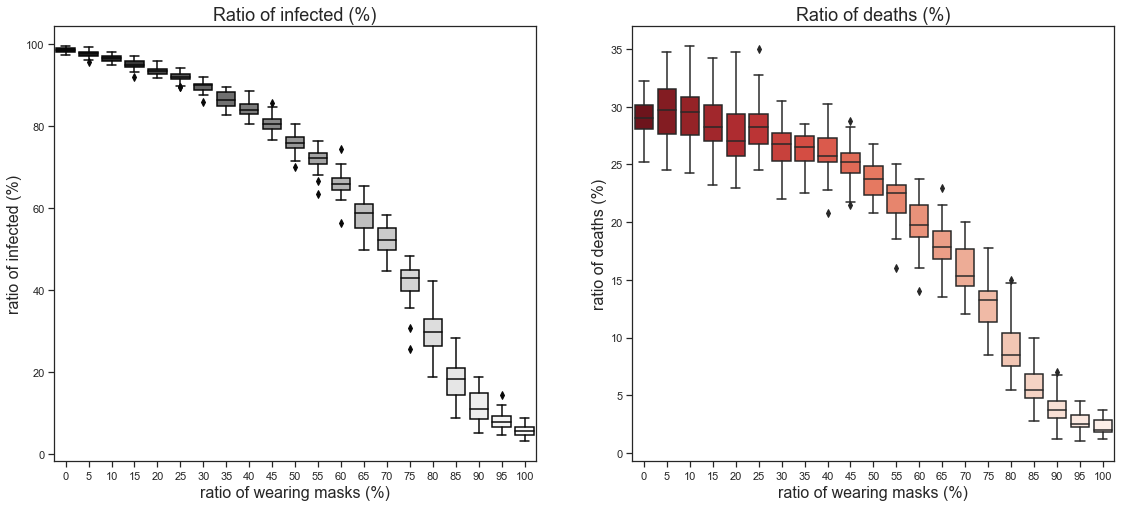

In [163]:
f,axes = plt.subplots(1,2, figsize=(19,8))
sns.set_theme(style="ticks", palette="pastel")


sns.boxplot(x="pct-wearing-masks", y="pct-infected",data=mask,palette="Greys_r",ax=axes[0])
sns.boxplot(x="pct-wearing-masks", y="pct-deaths",data=mask,palette="Reds_r",ax=axes[1])
axes[0].set_title('Ratio of infected (%)',fontsize=18)
axes[0].set_xlabel("ratio of wearing masks (%)",fontsize=16)
axes[0].set_ylabel("ratio of infected (%)",fontsize=16)

axes[1].set_title('Ratio of deaths (%)',fontsize=18)
axes[1].set_xlabel("ratio of wearing masks (%)",fontsize=16)
axes[1].set_ylabel("ratio of deaths (%)",fontsize=16)

Text(0, 0.5, 'ratio of deaths (%)')

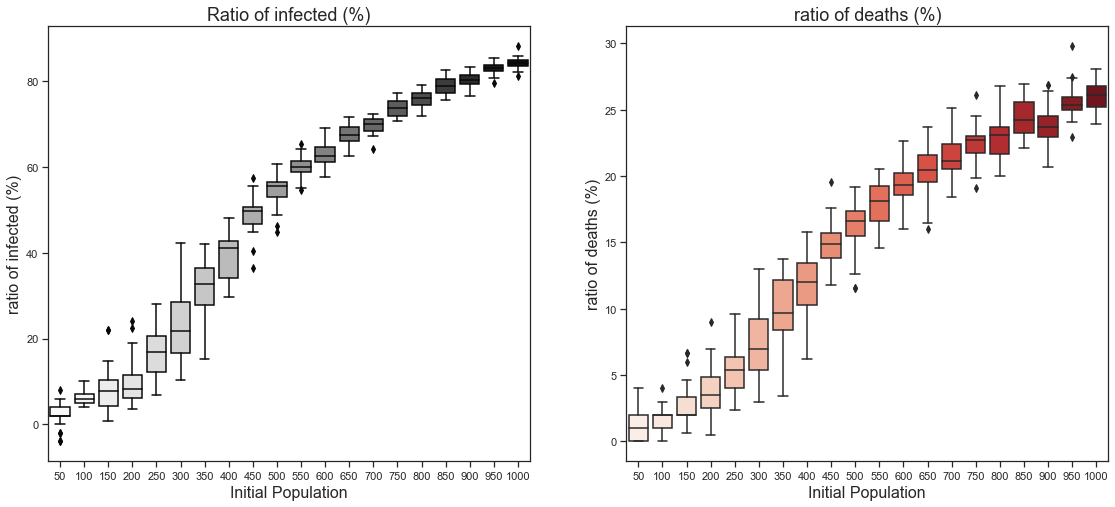

In [162]:
f,axes = plt.subplots(1,2, figsize=(19,8))
sns.set_theme(style="ticks", palette="pastel")


sns.boxplot(x="initial-population", y="pct-infected", orient="v",data=density,palette="Greys",ax=axes[0])
sns.boxplot(x="initial-population", y="pct-deaths", orient="v",data=density,palette="Reds",ax=axes[1])
axes[0].set_title('Ratio of infected (%)',fontsize=18)
axes[0].set_xlabel("Initial Population",fontsize=16)
axes[0].set_ylabel("ratio of infected (%)",fontsize=16)

axes[1].set_title('ratio of deaths (%)',fontsize=18)
axes[1].set_xlabel("Initial Population",fontsize=16)
axes[1].set_ylabel("ratio of deaths (%)",fontsize=16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct-wearing-masks  630 non-null    int64  
 1   pct-deaths         630 non-null    float64
 2   pct-infected       630 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 14.9 KB


In [143]:
#mask1 = mask.groupby(['pct-wearing-masks'])['pct-deaths'].agg(['mean']).reset_index().rename(columns={'mean':'Education',})

mask1 = mask.groupby(['pct-wearing-masks']).mean().reset_index()
density1 = density.groupby(['initial-population']).mean().reset_index()

In [145]:
mask1.head()

,pct-wearing-masks,pct-deaths,pct-infected
0,0,29.1417,98.4833
1,5,29.5583,97.5333
2,10,29.3917,96.5000
3,15,28.7583,94.9833
4,20,27.6583,93.5083


In [146]:
density1.head()

,initial-population,pct-deaths,pct-infected
0,50,1.1333,2.4667
1,100,1.7000,5.9667
2,150,2.8667,8.1111
3,200,3.7167,10.2000
4,250,5.4800,17.1200


In [157]:
# calculate spearman's correlation
from scipy.stats import spearmanr
coef, p = spearmanr(mask1['pct-wearing-masks'], mask1['pct-deaths'])
print('Spearmans correlation coefficient: %.4f' % coef)
# interpret the significance
alpha = 0.05

if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.4f' % p)

else:
    print('Samples are correlated (reject H0) p=%.4f' % p)

Spearmans correlation coefficient: -0.9948
Samples are correlated (reject H0) p=0.0000


In [158]:
# calculate spearman's correlation

coef, p = spearmanr(mask1['pct-wearing-masks'], mask1['pct-infected'])
print('Spearmans correlation coefficient: %.4f' % coef)
# interpret the significance
alpha = 0.05

if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.4f' % p)

else:
    print('Samples are correlated (reject H0) p=%.4f' % p)

Spearmans correlation coefficient: -1.0000
Samples are correlated (reject H0) p=0.0000


In [159]:
# calculate spearman's correlation

coef, p = spearmanr(density1['initial-population'], density1['pct-deaths'])
print('Spearmans correlation coefficient: %.4f' % coef)
# interpret the significance
alpha = 0.05

if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.4f' % p)

else:
    print('Samples are correlated (reject H0) p=%.4f' % p)

Spearmans correlation coefficient: 0.9985
Samples are correlated (reject H0) p=0.0000


In [160]:
# calculate spearman's correlation

coef, p = spearmanr(density1['initial-population'], density1['pct-deaths'])
print('Spearmans correlation coefficient: %.4f' % coef)
# interpret the significance
alpha = 0.05

if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.4f' % p)

else:
    print('Samples are correlated (reject H0) p=%.4f' % p)

Spearmans correlation coefficient: 0.9985
Samples are correlated (reject H0) p=0.0000
